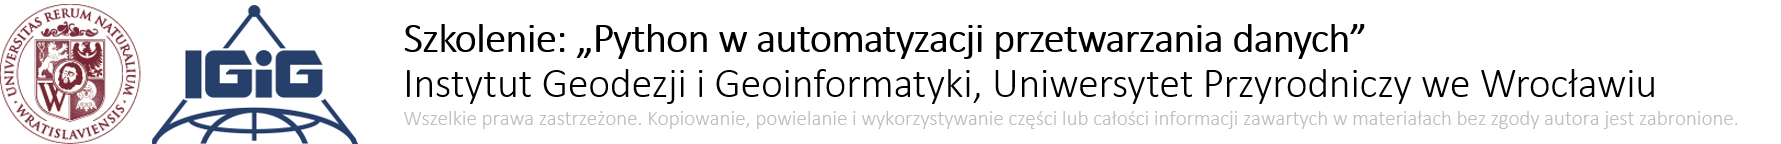


# Moduł 8 - Wizualizacje z matplotlibem

## Ogólne wskazówki dotyczące Matplotliba

Zanim zanurkujemy w szczegóły tworzenia wizualizacji z Matplotlib, jest kilka przydatnych rzeczy, które powinieneś wiedzieć o używaniu pakietu.

### Import Matplotlib

Tak jak używamy skrótu ``np`` dla NumPy i skrótu ``pd`` dla Pandas, tak będziemy używać pewnych standardowych skrótów dla importu Matplotlib:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Interfejs ``plt`` jest tym, czego będziemy używać najczęściej, jak zobaczymy w całym tym rozdziale.

### Czym jest wykres matplotliba

<img src="https://storage.googleapis.com/skytowner_public/images/uG4nzrYfQ9KDk2M87YDI/matplotlib_figure_axes_axis%20(4).png">

Text(4.0, -0.4, 'Made with http://matplotlib.org')

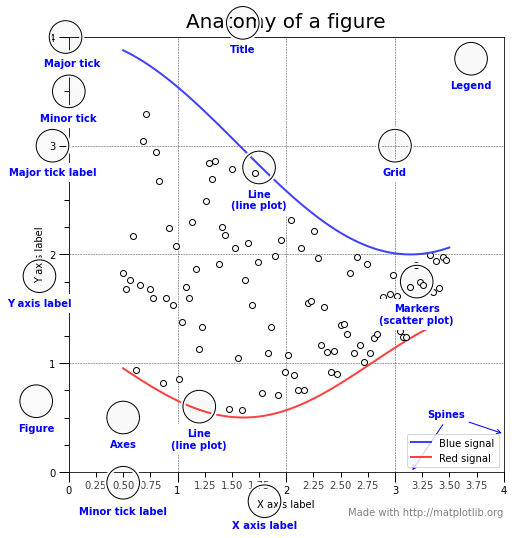

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

### Ustawianie stylów

Dyrektywę ``plt.style`` wykorzystamy do wyboru odpowiednich stylów estetycznych dla naszych wykresów.
Tutaj ustawimy styl ``classic``, dzięki czemu tworzone przez nas wykresy będą korzystały z klasycznego stylu Matplotlib:

In [3]:
plt.style.use('classic')

<img src="https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_001.png">
<img src="https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_002.png">
<img src="https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_003.png">
<img src="https://matplotlib.org/stable/_images/sphx_glr_style_sheets_reference_013.png">

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

### ``show()`` or No ``show()``

Wizualizacja, której nie możesz zobaczyć, nie będzie zbyt użyteczna, ale to, jak widzisz swoje wykresy Matplotlib, zależy od kontekstu. Najlepsze wykorzystanie Matplotliba różni się w zależności od tego, jak go używasz; w przybliżeniu, trzy stosowne konteksty to użycie Matplotliba w skrypcie, w terminalu IPython (Jupyter) lub w notatniku IPython (Jupyter).

#### Plotowanie z poziomu skryptu

Jeśli używasz Matplotlib z poziomu skryptu, funkcja ``plt.show()`` jest twoim przyjacielem.
Funkcja ``plt.show()`` uruchamia pętlę zdarzeń, szuka wszystkich aktualnie aktywnych obiektów figur i otwiera jedno lub więcej interaktywnych okien, które wyświetlają twoją figurę lub figury.

Tak więc, na przykład, możesz mieć plik o nazwie *myplot.py* zawierający następujące elementy:

```
python
import matplotlib.pyplot jako plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

Możesz następnie uruchomić ten skrypt z wiersza poleceń, co spowoduje otwarcie okna z wyświetloną figurą:

```
$ python myplot.py
```

Komenda ``plt.show()`` robi wiele pod maską, ponieważ musi współdziałać z interaktywnym graficznym backendem twojego systemu.
Szczegóły tej operacji mogą się bardzo różnić w zależności od systemu, a nawet instalacji, ale matplotlib robi wszystko, aby ukryć wszystkie te szczegóły przed tobą.

Jedna rzecz, na którą należy zwrócić uwagę: komenda ``plt.show()`` powinna być używana *tylko raz* na sesję Pythona i najczęściej jest widoczna na samym końcu skryptu.
Wiele komend ``show()`` może prowadzić do nieprzewidywalnego zachowania zależnego od backendu i w większości przypadków należy ich unikać.

Czasami ``show()`` nie jest wymagane w ogóle, gdy IDE otwiera nasze obrazki domyślnie (np. Spyder)

#### Plotowanie z notatnika IPython

Notatnik IPython jest opartym na przeglądarce internetowej interaktywnym narzędziem do analizy danych, które może łączyć narrację, kod, grafikę, elementy HTML i wiele innych w jeden dokument wykonywalny.

Interaktywne plotkowanie w ramach notatnika IPython może być wykonane za pomocą polecenia ``%matplotlib`` i działa w podobny sposób jak powłoka IPython.
W notatniku IPython, masz również możliwość osadzenia grafiki bezpośrednio w notatniku, z dwoma możliwymi opcjami:

- ``%matplotlib notebook`` prowadzi do *interaktywnych* wykresów osadzonych wewnątrz notatnika
- ``%matplotlib inline`` doprowadzi do *statycznych* obrazów osadzonych w notatniku.

Tutaj będziemy raczej używać ``%matplotlib inline``:

In [3]:
%matplotlib inline

Po uruchomieniu tego polecenia (należy to zrobić tylko raz na jądro/sesję, każda komórka w obrębie notatnika, która tworzy wykres, osadzi obraz PNG wynikowej grafiki:

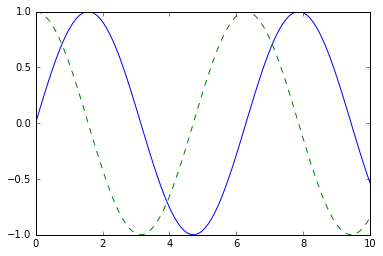

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Zapisywanie wykresów do pliku

Jedną z miłych cech Matplotlib jest możliwość zapisywania figur w wielu różnych formatach.
Zapisanie wykresy można wykonać za pomocą polecenia ``savefig()``.
Na przykład, aby zapisać poprzednią figurę jako plik PNG, można uruchomić to:

In [5]:
fig.savefig('my_figure.png')

Mamy teraz w bieżącym katalogu roboczym plik o nazwie ``my_figure.png``:

In [6]:
!ls -lh my_figure.png

-rw-r--r--  1 jakevdp  staff    16K Aug 11 10:59 my_figure.png


Aby potwierdzić, że zawiera on to, co myślimy, że zawiera, użyjmy obiektu IPython ``Image`` do wyświetlenia zawartości tego pliku:

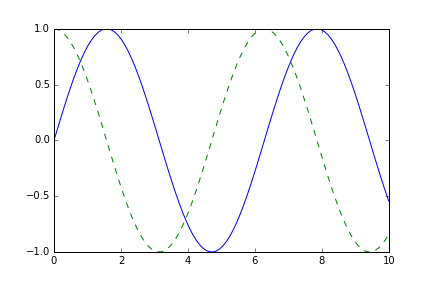

In [7]:
from IPython.display import Image
Image('my_figure.png')

W ``savefig()``, format pliku jest wnioskowany z rozszerzenia podanej nazwy pliku.
W zależności od tego jakie backendy masz zainstalowane, dostępnych jest wiele różnych formatów plików.
Lista obsługiwanych typów plików może być znaleziona dla twojego systemu poprzez użycie następującej metody obiektu figure canvas:

In [8]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Zauważ, że podczas zapisywania figury nie jest konieczne używanie ``plt.show()`` lub pokrewnych poleceń omawianych wcześniej.

## Dwa interfejsy za cenę jednego

Potencjalnie mylącą cechą Matplotliba są jego dwa interfejsy: wygodny interfejs oparty na stanach w stylu MATLABa oraz bardziej rozbudowany interfejs obiektowy. Przedstawimy tutaj szybko różnice między nimi.

#### Interfejs w stylu MATLABa

Matplotlib został pierwotnie napisany jako alternatywa Pythona dla użytkowników MATLABa, i wiele z jego składni odzwierciedla ten fakt.
Narzędzia w stylu MATLAB są zawarte w interfejsie pyplot (``plt``).
Na przykład, poniższy kod będzie prawdopodobnie wyglądał dość znajomo dla użytkowników MATLABa:

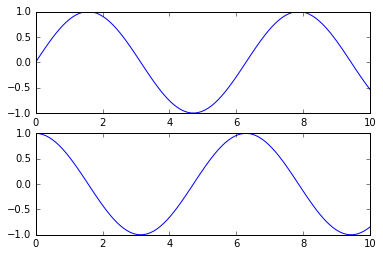

In [9]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Ważne jest by zauważyć, że ten interfejs jest *stateczny*: śledzi "bieżącą" figurę i osie, które są miejscem gdzie wszystkie komendy ``plt`` są stosowane.
Możesz uzyskać do nich odniesienie używając procedur ``plt.gcf()`` (get current figure) i ``plt.gca()`` (get current axes).

Podczas gdy ten stanowy interfejs jest szybki i wygodny dla prostych wykresów, łatwo jest napotkać problemy.
Na przykład, jak po utworzeniu drugiego panelu możemy wrócić i dodać coś do pierwszego?
Jest to możliwe w interfejsie w stylu MATLABa, ale jest to nieco kłopotliwe.
Na szczęście istnieje lepszy sposób.

#### Interfejs zorientowany obiektowo

Interfejs zorientowany obiektowo jest dostępny dla tych bardziej skomplikowanych sytuacji oraz dla tych, które wymagają większej kontroli nad wykresem.
Zamiast zależeć od pojęcia "aktywnej" figury lub osi, w interfejsie obiektowym funkcje wykreślania są *metodami* jawnych obiektów ``Figure`` i ``Axes``.
Aby odtworzyć poprzedni wątek przy użyciu tego stylu plotowania, możesz wykonać następujące czynności:

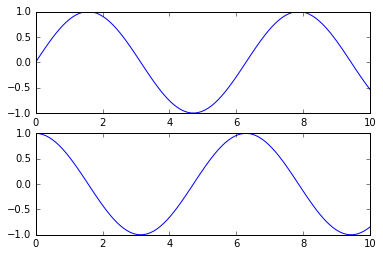

In [10]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

# Proste wykresy liniowe

Chyba najprostszym ze wszystkich wykresów jest wizualizacja pojedynczej funkcji $y = f(x)$.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Najlepiej prace z wykresami rozpoczać od stworzenia ramki (figury) i osi.

W najprostszej postaci figurę i osie można utworzyć w następujący sposób:

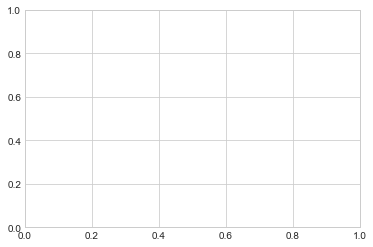

In [6]:
fig = plt.figure()
ax = plt.axes()

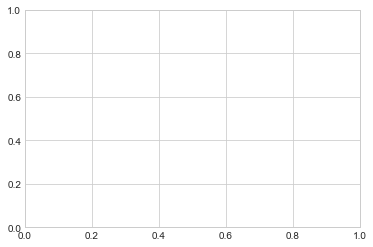

In [7]:
fig, ax = plt.subplots(1)

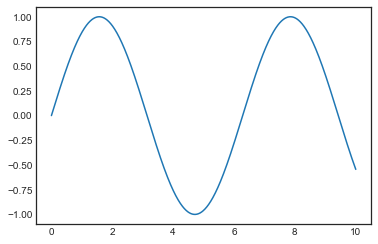

In [51]:
fig, ax = plt.subplots(1)

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Jeśli chcemy stworzyć jedną figurę z wieloma liniami, możemy po prostu wywołać funkcję ``plot`` wielokrotnie:

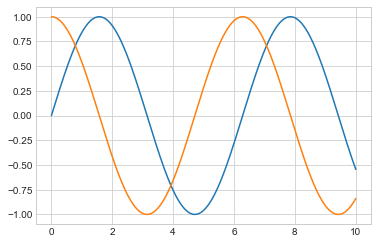

In [9]:
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

## Dostosowywanie wykresu: Kolory i style linii

Pierwszą zmianą, jaką możesz chcieć wprowadzić do wykresu, jest kontrola kolorów i stylów linii.
Funkcja ``plt.plot()`` przyjmuje dodatkowe argumenty, które mogą być użyte do ich określenia.
Aby dostosować kolor, można użyć słowa kluczowego ``color``, które przyjmuje argument łańcuchowy reprezentujący praktycznie każdy wyobrażalny kolor.
Kolor może być określony na wiele sposobów:

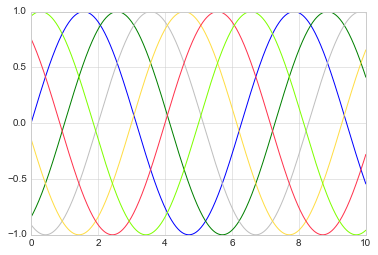

In [6]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

Jeśli nie podano koloru, Matplotlib automatycznie przejdzie przez zestaw domyślnych kolorów dla wielu linii.

Podobnie, styl linii może być dostosowany za pomocą słowa kluczowego ``linestyle``:

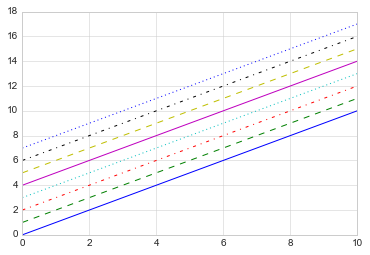

In [7]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

Jeśli chcesz być wyjątkowo zwięzły, te kody ``linestyle`` i ``color`` mogą być połączone w jeden nie-kluczowy argument do funkcji ``plt.plot()``:

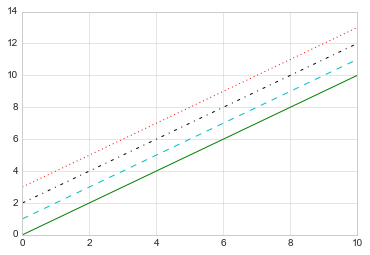

In [8]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

Te jednoznakowe kody kolorów odzwierciedlają standardowe skróty w systemach kolorów RGB (Red/Green/Blue) i CMYK (Cyan/Magenta/Yellow/blacK), powszechnie używanych w cyfrowej grafice kolorowej.

Istnieje wiele innych argumentów słów kluczowych, które mogą być użyte do dostrojenia wyglądu wykresu; aby uzyskać więcej szczegółów, proponuję przejrzeć docstring funkcji ``plt.plot()`` 

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

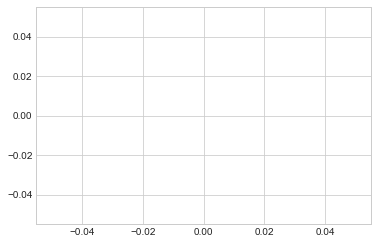

In [10]:
help(plt.plot())

## Dostosowywanie wykresu: Granice osi

Matplotlib wykonuje przyzwoitą pracę wybierając domyślne limity osi dla twojego wykresu, ale czasami miło jest mieć większą kontrolę.

Najbardziej podstawowym sposobem dostosowania granic osi jest użycie metod ``plt.xlim()`` i ``plt.ylim()``:

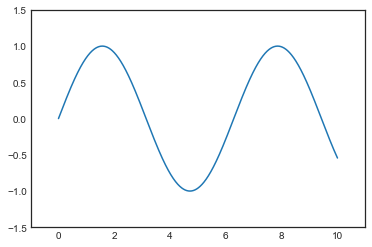

In [52]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

Jeśli z jakiegoś powodu chcesz, aby któraś z osi była wyświetlana odwrotnie, możesz po prostu odwrócić kolejność argumentów:

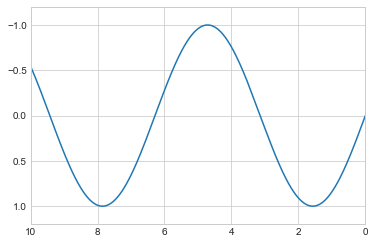

In [12]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

Metoda ``plt.axis()`` pozwalając robić takie rzeczy jak automatyczne zacieśnianie granic wokół bieżącego zakresu wykresu:

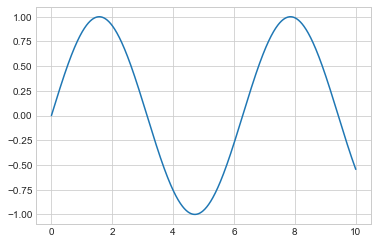

In [13]:
plt.plot(x, np.sin(x))
plt.axis('tight');

Pozwala nawet na specyfikacje wyższego poziomu, takie jak zapewnienie równego współczynnika proporcji, aby na twoim ekranie jedna jednostka w ``x`` jest równa jednej jednostce w ``y``:

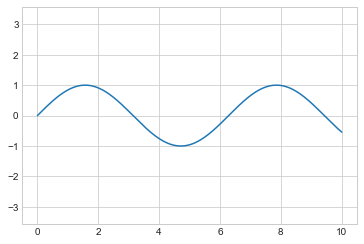

In [14]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## Etykietowanie wykresów

Tytuły i etykiety osi są najprostszymi etykietami - istnieją metody, które mogą być użyte do ich szybkiego ustawienia:

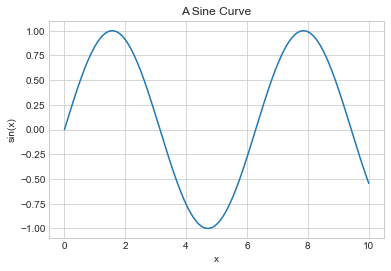

In [15]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

Pozycja, rozmiar i styl tych etykiet mogą być dostosowane za pomocą opcjonalnych argumentów funkcji.
Aby uzyskać więcej informacji, zobacz dokumentację Matplotlib i docstrings każdej z tych funkcji.

Kiedy wiele linii jest pokazywanych w obrębie jednej osi, może być użyteczne utworzenie legendy, która etykietuje każdy typ linii.
Ponownie, Matplotlib ma wbudowany sposób na szybkie stworzenie takiej legendy.
Odbywa się to za pomocą (pewnie zgadłeś) metody ``plt.legend()``.
Chociaż istnieje kilka ważnych sposobów użycia, uważam, że najłatwiej jest określić etykietę każdej linii używając słowa kluczowego ``label`` funkcji plot:

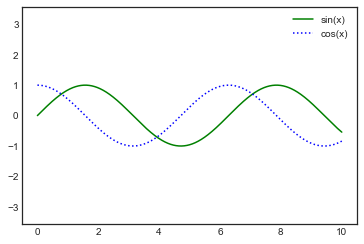

In [53]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

Jak widać, funkcja ``plt.legend()`` śledzi styl i kolor linii, i dopasowuje je do właściwej etykiety.
Więcej informacji na temat określania i formatowania legend można znaleźć w docstring ``plt.legend``.

Ale jest wiele sposobów, na które możemy chcieć dostosować taką legendę.
Na przykład możemy określić lokalizację i wyłączyć obramowanie:

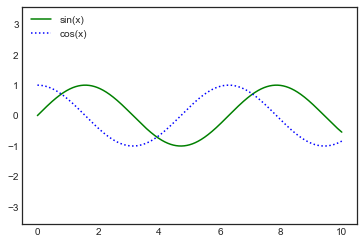

In [55]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='upper left', frameon=False)

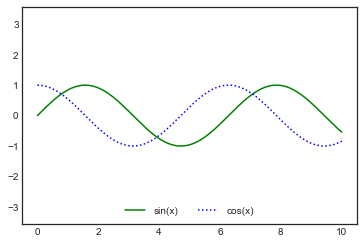

In [56]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(frameon=False, loc='lower center', ncol=2)

## Wybieranie elementów do legendy

Jak już widzieliśmy, legenda domyślnie zawiera wszystkie elementy z etykietami.
Jeśli nie jest to pożądane, możemy dostosować, które elementy i etykiety pojawiają się w legendzie, używając obiektów zwracanych przez polecenia plot.
Polecenie ``plt.plot()`` jest w stanie utworzyć wiele linii naraz i zwraca listę utworzonych instancji linii.
Przekazanie którejkolwiek z nich do ``plt.legend()`` powie, które z nich mają być zidentyfikowane, wraz z etykietami, które chcielibyśmy określić:

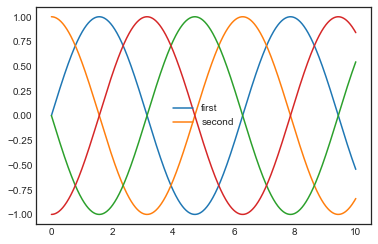

In [63]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

Ogólnie rzecz biorąc, w praktyce stwierdzam, że jaśniejsze jest użycie pierwszej metody, stosując etykiety do elementów, które chciałbyś pokazać na legendzie:

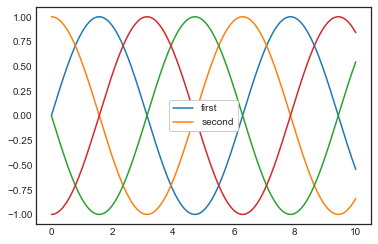

In [64]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Zauważ, że domyślnie legenda ignoruje wszystkie elementy bez ustawionego atrybutu ``label``.

## Problemy

Podczas gdy większość funkcji ``plt`` tłumaczy się bezpośrednio na metody ``ax`` (takie jak ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, itd.), nie jest tak dla wszystkich komend.
W szczególności, funkcje do ustawiania granic, etykiet i tytułów są nieco zmodyfikowane.
W celu przejścia między funkcjami w stylu MATLAB-a a metodami obiektowymi, należy wprowadzić następujące zmiany:

- ``plt.xlabel()`` → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()`` → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

W obiektowym interfejsie do plotowania, zamiast wywoływać te funkcje pojedynczo, często wygodniej jest użyć metody ``ax.set()`` do ustawienia wszystkich tych właściwości naraz:

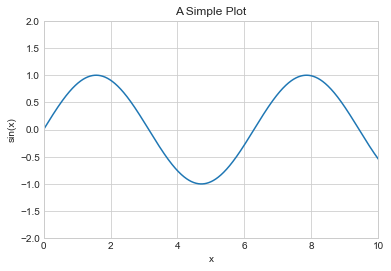

In [16]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Wykresy rozproszone z ``plt.plot``

Okazuje się, że ta sama funkcja może również tworzyć wykresy rozproszone:

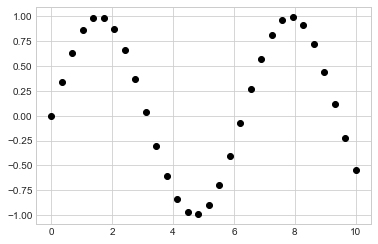

In [17]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

Trzecim argumentem w wywołaniu funkcji jest znak, który reprezentuje typ symbolu użytego do wykreślenia. Podobnie jak można określić opcje takie jak ``'-'``, ``'--'``, aby kontrolować styl linii, styl markerów ma swój własny zestaw krótkich kodów łańcuchowych. Pełną listę dostępnych symboli można zobaczyć w dokumentacji ``plt.plot``, lub w dokumentacji online Matplotliba. Większość możliwości jest dość intuicyjna, a my pokażemy tutaj kilka bardziej popularnych:

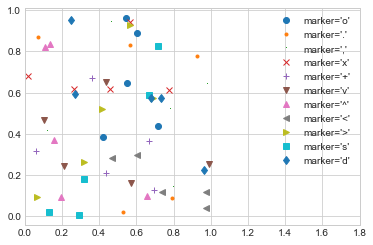

In [18]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Aby uzyskać jeszcze więcej możliwości, te kody znaków mogą być używane razem z kodami linii i kolorów do wykreślania punktów wraz z łączącą je linią:

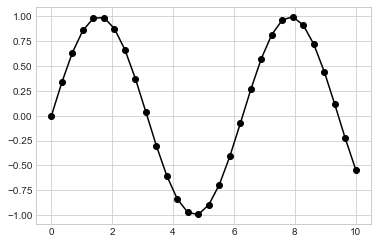

In [19]:
plt.plot(x, y, '-ok');

Dodatkowe argumenty słowa kluczowego do ``plt.plot`` określają szeroki zakres właściwości linii i markerów:

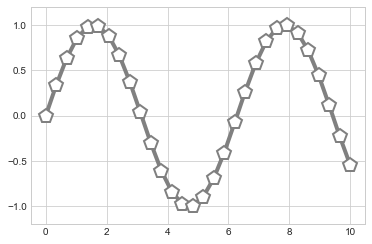

In [20]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

Ten rodzaj elastyczności funkcji ``plt.plot`` pozwala na szeroki wachlarz możliwych opcji wizualizacji.
Pełny opis dostępnych opcji znajduje się w dokumentacji ``plt.plot``.

## Wykresy rozproszone z ``plt.scatter``

Drugą, bardziej wydajną metodą tworzenia wykresów rozproszonych jest funkcja ``plt.scatter``, która może być używana bardzo podobnie do funkcji ``plt.plot``:

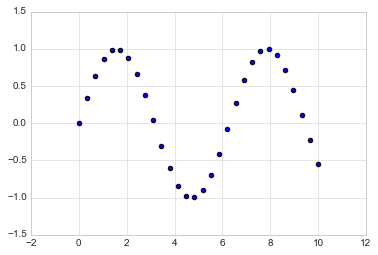

In [6]:
plt.scatter(x, y, marker='o');

Podstawową różnicą ``plt.scatter`` od ``plt.plot`` jest to, że może być używany do tworzenia wykresów rozproszenia, gdzie właściwości każdego punktu (rozmiar, kolor powierzchni, kolor krawędzi, itp.) mogą być indywidualnie kontrolowane lub mapowane na dane.

Pokażmy to tworząc losowy wykres rozproszenia z punktami o wielu kolorach i rozmiarach.
Aby lepiej zobaczyć nakładające się wyniki, użyjemy również słowa kluczowego ``alpha``, aby dostosować poziom przezroczystości:

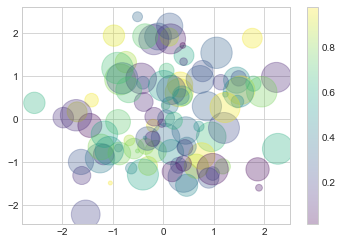

In [21]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Zauważ, że argument kolor jest automatycznie mapowany na skalę kolorów (pokazaną tutaj przez komendę ``colorbar()``), a argument rozmiar jest podawany w pikselach.
W ten sposób, kolor i rozmiar punktów może być użyty do przekazania informacji w wizualizacji, w celu wizualizacji wielowymiarowych danych.

Na przykład, możemy użyć danych Iris z Scikit-Learn, gdzie każda próbka jest jednym z trzech rodzajów kwiatów, które miały dokładnie zmierzony rozmiar swoich płatków i działek:

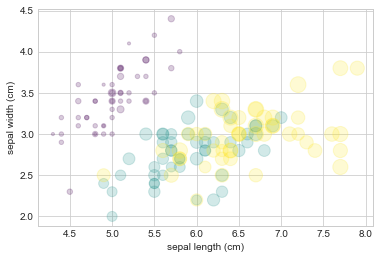

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Podstawowe "wykresy wąsowe"

Podstawowe wykresy wartości i błędów mogą być utworzone za pomocą jednego wywołania funkcji Matplotlib:

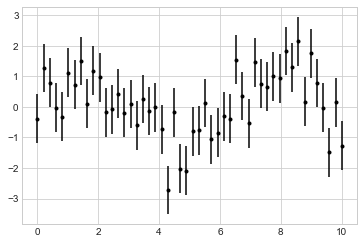

In [24]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Tutaj ``fmt`` jest kodem formatu kontrolującym wygląd linii i punktów, i ma taką samą składnię jak skrót używany w ``plt.plot``.

Oprócz tych podstawowych opcji, funkcja ``errorbar`` posiada wiele opcji pozwalających na dostrojenie wyglądu "wąsów".

Używając tych dodatkowych opcji można łatwo dostosować estetykę wykresu errorbar.

Często uważam, że pomocne jest, zwłaszcza w zatłoczonych wykresach, aby paski błędów były jaśniejsze niż same punkty:

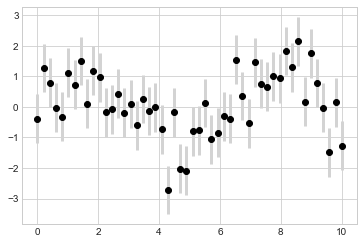

In [25]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

Oprócz tych opcji, możesz także określić poziome paski błędów (``xerr``), jednostronne paski błędów i wiele innych wariantów.
Więcej informacji na temat dostępnych opcji można znaleźć w docstring ``plt.errorbar``.

## Wizualizacja funkcji trójwymiarowej

Zaczniemy od zademonstrowania wykresu konturowego przy użyciu funkcji $z = f(x, y)$

In [27]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Wykres konturowy można utworzyć za pomocą funkcji ``plt.contour``.
Przyjmuje ona trzy argumenty: siatkę wartości *x*, siatkę wartości *y* i siatkę wartości *z*.
Wartości *x* i *y* reprezentują pozycje na działce, a wartości *z* będą reprezentowane przez poziomy konturu.
Prawdopodobnie najprostszym sposobem przygotowania takich danych jest użycie funkcji ``np.meshgrid``, która buduje dwuwymiarowe siatki z jednowymiarowych tablic:

In [29]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Teraz spójrzmy na to za pomocą standardowego wykresu konturowego z liniami:

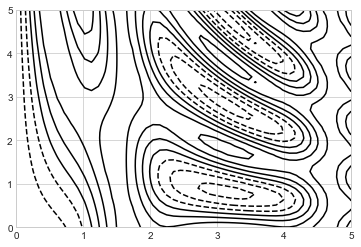

In [30]:
plt.contour(X, Y, Z, colors='black');

Zauważ, że domyślnie, gdy używany jest jeden kolor, wartości ujemne reprezentowane są przez linie przerywane, a wartości dodatnie przez linie ciągłe.
Alternatywnie, linie mogą być oznaczone kolorami poprzez określenie mapy kolorów za pomocą argumentu ``cmap``.
Tutaj określimy również, że chcemy, aby narysowanych zostało więcej linii - 20 w równych odstępach w obrębie zakresu danych:

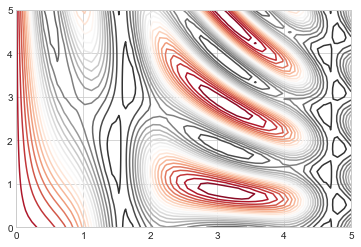

In [31]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Tutaj wybraliśmy kolormapę ``RdGy`` (skrót od *Red-Gray*), która jest dobrym wyborem dla wyśrodkowanych danych.
Matplotlib posiada szeroką gamę dostępnych colormap, które możesz łatwo przeglądać w IPythonie wykonując uzupełnianie zakładek w module ``plt.cm``:
```
plt.cm.<TAB>
```

Nasz wykres wygląda ładniej, ale spacje między liniami mogą być nieco rozpraszające.
Możemy to zmienić przełączając się na wypełniony wykres konturowy za pomocą funkcji ``plt.contourf()`` (zauważ ``f`` na końcu), która używa w dużej mierze tej samej składni co ``plt.contour()``.

Dodatkowo, dodamy komendę ``plt.colorbar()``, która automatycznie tworzy dodatkową oś z informacjami o kolorze dla wykresu:

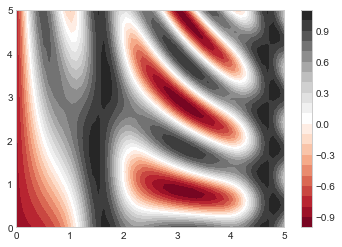

In [32]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

Kolorowy pasek sprawia, że jasne jest, że czarne regiony to "szczyty", podczas gdy czerwone regiony to "doliny".

Jednym z potencjalnych problemów z tym wykresem jest to, że jest on nieco "plamisty". Oznacza to, że kroki kolorów są raczej dyskretne niż ciągłe, co nie zawsze jest pożądane.
Można temu zaradzić, ustawiając liczbę konturów na bardzo dużą, ale skutkuje to raczej nieefektywnym wykresem: Matplotlib musi renderować nowy wielokąt dla każdego kroku w poziomie.
Lepszym sposobem na poradzenie sobie z tym jest użycie funkcji ``plt.imshow()``, która interpretuje dwuwymiarową siatkę danych jako obraz.

Pokazuje to następujący kod:

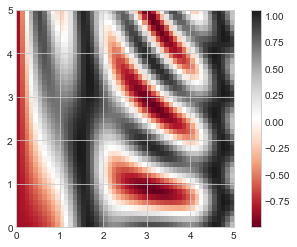

In [34]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()

Czasami może być użyteczne połączenie konturów i obrazów.
Na przykład, tutaj użyjemy częściowo przezroczystego obrazu tła (z przezroczystością ustawioną przez parametr ``alpha``) i overplot konturów z etykietami na samych konturach (używając funkcji ``plt.clabel()``):

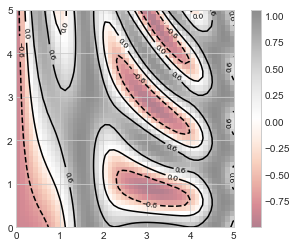

In [35]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

# Histogramy, Binningi, and Gęstości

Prosty histogram może być świetnym pierwszym krokiem do zrozumienia zbioru danych.

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

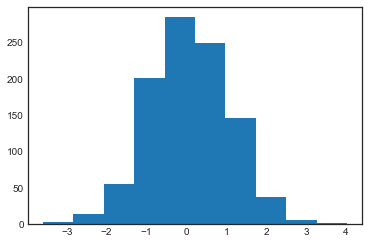

In [37]:
plt.hist(data);

Funkcja ``hist()`` posiada wiele opcji pozwalających dostroić zarówno obliczenia, jak i sposób wyświetlania; 
oto przykład bardziej dostosowanego histogramu:

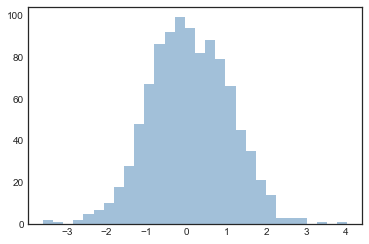

In [41]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', 
         color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring ma więcej informacji na temat innych dostępnych opcji dostosowywania.
Uważam, że ta kombinacja ``histtype='stepfilled'`` wraz z pewną przejrzystością ``alpha`` jest bardzo użyteczna przy porównywaniu histogramów kilku dystrybucji:

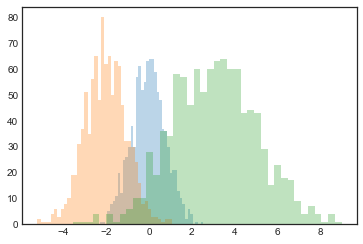

In [43]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Jeśli chciałbyś po prostu obliczyć histogram (czyli policzyć liczbę punktów w danym binie) i nie wyświetlać go, dostępna jest funkcja ``np.histogram()``:

In [44]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 17 257 534 184   8]


## Histogramy dwuwymiarowe i (binningi) kosze

Podobnie jak tworzymy histogramy w jednym wymiarze, dzieląc linię liczbową na kosze, możemy również tworzyć histogramy w dwóch wymiarach, dzieląc punkty na dwuwymiarowe kosze.
Przyjrzymy się tutaj pokrótce kilku sposobom na zrobienie tego.
Zaczniemy od zdefiniowania pewnych danych - tablicy ``x`` i ``y`` wyciągniętej z wielowymiarowego rozkładu gaussowskiego:

In [45]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

Jednym z prostych sposobów na wykreślenie dwuwymiarowego histogramu jest użycie funkcji ``plt.hist2d`` Matplotliba:

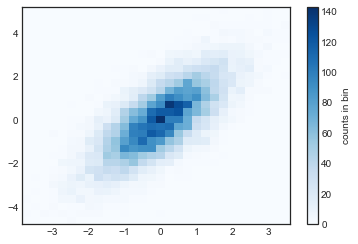

In [46]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Tak jak w przypadku ``plt.hist``, ``plt.hist2d`` ma wiele dodatkowych opcji do dostrojenia wykresu i binowania, które są ładnie opisane w docstringu funkcji.
Dalej, tak jak ``plt.hist`` ma swój odpowiednik w ``np.histogram``, tak ``plt.hist2d`` ma swój odpowiednik w ``np.histogram2d``, który może być użyty w następujący sposób:

In [47]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

### ``plt.hexbin``: Sześciokątne koszykowanie

Dwuwymiarowy histogram tworzy teselację kwadratów w poprzek osi.
Innym naturalnym kształtem dla takiej teselacji jest sześciokąt foremny.
W tym celu Matplotlib udostępnia procedurę ``plt.hexbin``, która reprezentuje dwuwymiarowy zbiór danych zbindowany w siatce sześciokątów:

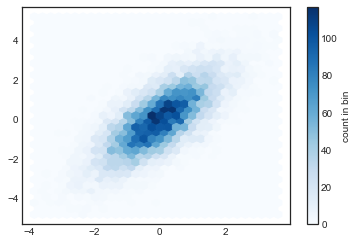

In [48]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` ma wiele ciekawych opcji, w tym możliwość określenia wag dla każdego punktu, oraz zmiany danych wyjściowych w każdym binie na dowolny agregat NumPy (średnia wag, odchylenie standardowe wag, itp.).

## ``plt.axes``: subploty z ręki

Najbardziej podstawową metodą tworzenia osi jest użycie funkcji ``plt.axes``.
Jak widzieliśmy wcześniej, domyślnie tworzy ona standardowy obiekt axes, który wypełnia całą figurę.
Funkcja ``plt.axes`` przyjmuje również opcjonalny argument, który jest listą czterech liczb w układzie współrzędnych figury.
Liczby te reprezentują ``[left, bottom, width, height]`` w układzie współrzędnych figury, który rozciąga się od 0 na dole po lewej stronie figury do 1 na górze po prawej stronie figury.

Na przykład, możemy utworzyć oś wstawki w prawym górnym rogu innej osi, ustawiając *x* i *y* position na 0.65 (to znaczy, że zaczyna się w 65% szerokości i 65% wysokości figury) oraz *x* i *y* extents na 0.2 (to znaczy, że rozmiar osi wynosi 20% szerokości i 20% wysokości figury):

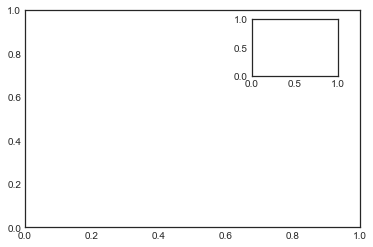

In [65]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

## ``plt.subplots``: Cała siatka za jednym zamachem

Argumentami są liczba wierszy i liczba kolumn oraz opcjonalne słowa kluczowe ``sharex`` i ``sharey``, które pozwalają określić relacje między różnymi osiami.

Tutaj stworzymy siatkę podplotów o wielkości 2x3, gdzie wszystkie osie w tym samym wierszu mają wspólną skalę osi y, a wszystkie osie w tej samej kolumnie mają wspólną skalę osi x:

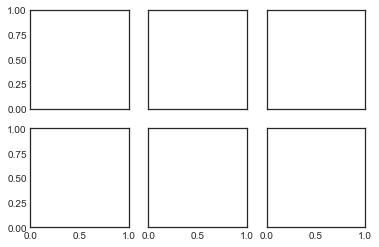

In [67]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

Zauważ, że poprzez określenie ``sharex`` i ``sharey``, automatycznie usunęliśmy wewnętrzne etykiety na siatce, aby uczynić wykres czystszym.

Wynikowa siatka instancji osi jest zwracana w tablicy NumPy, co pozwala na wygodne określenie pożądanych osi przy użyciu standardowej notacji indeksowania tablicy:

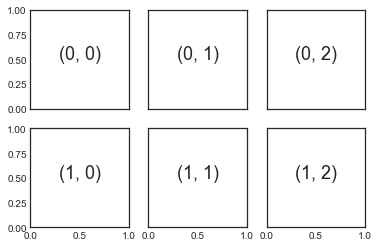

In [68]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

## ``plt.GridSpec``: Bardziej skomplikowane układy

Aby wyjść poza zwykłą siatkę do subplotów, które obejmują wiele wierszy i kolumn, najlepszym narzędziem jest ``plt.GridSpec()``.
Obiekt ``plt.GridSpec()`` nie tworzy sam w sobie wykresu; jest to po prostu wygodny interfejs, który jest rozpoznawany przez komendę ``plt.subplot()``.
Na przykład, gridspec dla siatki dwóch wierszy i trzech kolumn o pewnej określonej szerokości i wysokości przestrzeni wygląda tak:

In [69]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

Na tej podstawie możemy określić lokalizacje subplota i rozszerzyć jego wysokość lub szerokość używając znanej składni indeksowania Pythona:

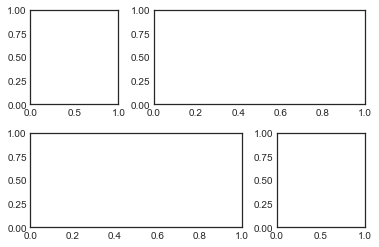

In [70]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

Ten rodzaj elastycznego wyrównywania siatki ma szeroki zakres zastosowań.
Najczęściej używam go podczas tworzenia wieloosiowych wykresów histogramów, takich jak te pokazane tutaj:

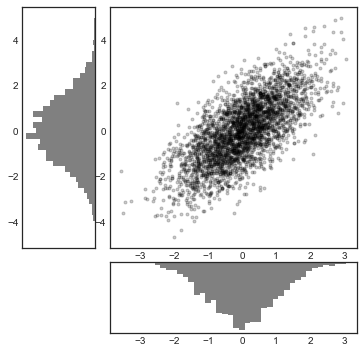

In [71]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# Dostosowywanie znaczników osi

Domyślne lokalizatory i formaty znaczników osi w Matplotlib są zaprojektowane tak, aby były wystarczające w wielu typowych sytuacjach, ale nie są w żaden sposób optymalne dla każdego wykresu. Ta sekcja poda kilka przykładów dostosowania lokalizacji znaczników osi i formatowania do konkretnego typu wykresu, którą mógłbyś być zainteresowany.

## Major and Minor Ticks

W obrębie każdej osi istnieje pojęcie *większego* (major) ticku i *mniejszego* (minor) znacznika (ticku). Jak sugerują nazwy, główne znaczniki są zazwyczaj większe lub bardziej wyraziste, podczas gdy drugorzędne znaczniki są zazwyczaj mniejsze. Domyślnie Matplotlib rzadko korzysta z małych znaczników, ale jednym z miejsc, w którym można je zobaczyć, jest wykres logarytmiczny:

In [72]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

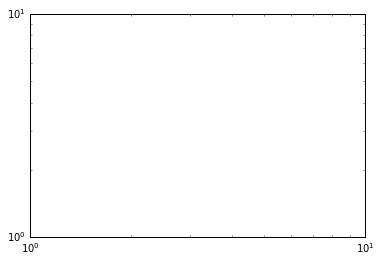

In [73]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

Widzimy tutaj, że każde większe zaznaczenie pokazuje duży znacznik i etykietę, podczas gdy każdy mniejszy znacznik pokazuje się bez etykiety.

## Ukrywanie znaczników i etykiet

Prawdopodobnie najbardziej powszechną operacją formatowania znaczników/etykiet jest operacja ich ukrywania.
Można to zrobić za pomocą ``plt.NullLocator()`` i ``plt.NullFormatter()``, jak pokazano tutaj:

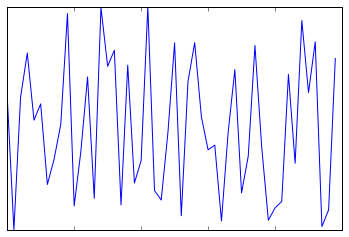

In [76]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Zauważ, że usunęliśmy etykiety (ale zachowaliśmy kleszcze/linie siatki) z osi x oraz usunęliśmy znaczniki (a więc także etykiety) z osi y.

Może być to przydatne w wielu sytuacjach - na przykład, gdy chcemy pokazać siatkę obrazów.
Na przykład, rozważmy poniższy rysunek:

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Radosław.Zajdel\scikit_learn_data


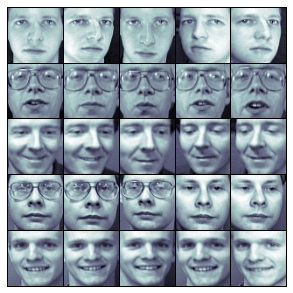

In [77]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

Zauważ, że każdy obraz ma swoją własną oś, a my ustawiliśmy lokalizatory na null, ponieważ wartości tick (w tym przypadku liczba pikseli) nie przekazują istotnych informacji dla tej konkretnej wizualizacji.

## Zmniejszanie lub zwiększanie liczby działek

Jednym z częstych problemów z domyślnymi ustawieniami jest to, że mniejsze subploty mogą wyświetlać się z zatłoczonymi etykietami.

Możemy to zaobserwować w pokazanej tutaj siatce:

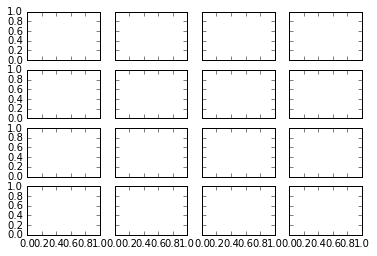

In [78]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Szczególnie w przypadku osi x, etykiety prawie się pokrywają i sprawiają, że są dość trudne do rozszyfrowania.
Możemy to naprawić za pomocą funkcji ``plt.MaxNLocator()``, która pozwala nam określić maksymalną liczbę znaczników, które zostaną wyświetlone.
Biorąc pod uwagę tę maksymalną liczbę, Matplotlib użyje wewnętrznej logiki, aby wybrać poszczególne lokalizacje kleszczy:

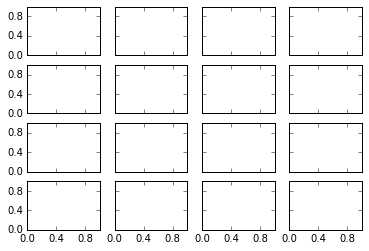

In [79]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

Dzięki temu wszystko jest znacznie czystsze. Jeśli chcesz mieć jeszcze większą kontrolę nad położeniem regularnie rozmieszczonych znaczników, możesz również użyć ``plt.MultipleLocator``

## Fantazyjne formaty znaczników

Domyślne formatowanie znaczników w Matplotlib może pozostawiać wiele do życzenia: działa dobrze jako domyślne, ale czasami chciałbyś zrobić coś więcej.
Rozważmy ten wykres sinusa i cosinusa:

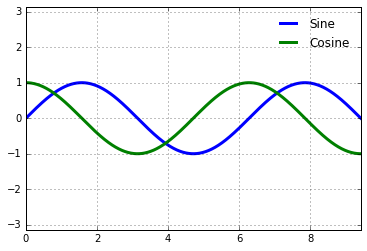

In [80]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

Jest kilka zmian, które moglibyśmy wprowadzić. Po pierwsze, bardziej naturalne dla tych danych jest rozmieszczenie kleszczy i linii siatki w wielokrotnościach $pi$. Możemy to zrobić ustawiając ``MultipleLocator``, który umiejscawia znaczniki w wielokrotności podanej przez użytkownika liczby. Dla porządku dodamy zarówno główne, jak i mniejsze punkty w wielokrotnościach $pi/4$:

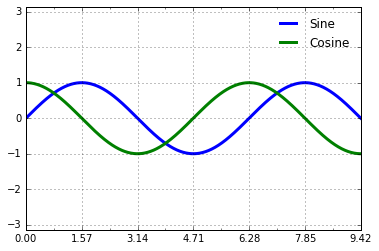

In [82]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

Ale teraz te etykiety wyglądają trochę głupio: widzimy, że są one wielokrotnościami $pi$, ale reprezentacja dziesiętna nie przekazuje tego od razu.
Aby to naprawić, możemy zmienić formatownik zaznaczeń. Nie ma wbudowanego formatyzatora dla tego, co chcemy zrobić, więc zamiast tego użyjemy ``plt.FuncFormatter``, który akceptuje funkcję zdefiniowaną przez użytkownika, dającą precyzyjną kontrolę nad wyjściami zaznaczeń:

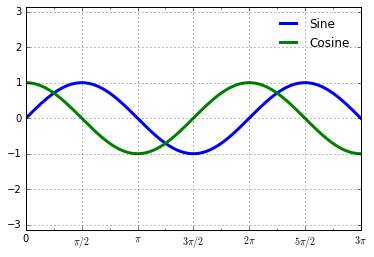

In [83]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

To jest o wiele lepsze! Zauważ, że wykorzystaliśmy wsparcie Matplotliba dla LaTeX, określone przez zamknięcie łańcucha w znakach dolara. Jest to bardzo wygodne przy wyświetlaniu symboli matematycznych i formuł: w tym przypadku, ``"$pi$"`` jest renderowane jako grecki znak $pi$.

Funkcja ``plt.FuncFormatter()`` oferuje bardzo szczegółową kontrolę nad wyglądem i jest bardzo przydatna podczas przygotowywania wykresów do prezentacji lub publikacji.

## Podsumowanie formatek i lokalizatorów

Wspomnieliśmy o kilku dostępnych formaterach i lokalizatorach.

Zakończymy ten rozdział, krótko wymieniając wszystkie wbudowane opcje lokalizatorów i formatyzatorów. Więcej informacji na temat każdej z nich można znaleźć w dokumentacji lub w dokumentacji online Matplotliba.
Każda z poniższych opcji jest dostępna w przestrzeni nazw ``plt``:

Klasa lokalizatora | Opis
---------------------|-------------
``NullLocator`` - brak znaczników
``FixedLocator`` | lokalizacje znaczników są stałe
``IndexLocator`` | Lokalizator dla znaczników indeksowych (np. gdzie x = range(len(y)))
``LinearLocator`` - równomiernie rozmieszczone znaczników od min do max.
``LogLocator`` | Logarytmicznie rozmieszczone znaczników od min do max
``MultipleLocator`` | Znaczniki i zakres są wielokrotnością podstawy
``MaxNLocator`` | Znajduje do maksymalnej liczby znaczników w ładnych lokalizacjach
``AutoLocator`` (Domyślnie.) MaxNLocator z prostymi wartościami domyślnymi.
`AutoMinorLocator`` - lokalizator dla mniejszych znaczników

Klasa Formatter | Opis
----------------------|---------------
``NullFormatter`` | Brak etykiet na znacznikach
``IndexFormatter`` | Ustawianie formatów z listy etykiet
``FixedFormatter`` | Ustaw ręcznie formaty dla etykiet
``FuncFormatter`` | Funkcja zdefiniowana przez użytkownika ustawia etykiety
``FormatStrFormatter``| Użyj łańcucha formatu dla każdej wartości
``ScalarFormatter`` | (Domyślnie.) Formatownik dla wartości skalarnych
``LogFormatter`` | Domyślny formatownik dla osi logów
